# Graphical models

## Bayesian networks

directed graphical models detailing how each variable affects another

directed acyclic graph (DAG) - no looping paths

$P(X_1, ..., X_n) = \prod_i P(X_i \mid parents(X_i))$

**e.g.** given joint distribution over $X_1, ..., X_n$ as $P(X_1, X_2, ..., X_n)$

can write as $P(X_1) P(X_2 | X_1) P(X_3 | X_2, X_1) P(X_4 | X_3, X_2, X_1) \cdots$

but there may not be all direct dependencies (conditional independence)

perhaps $X_4$ depends on $X_2$ and $X_3$ but not directly on $X_1$  
then even if $X_2$ and $X_3$ depend directly on $X_1$, we can write 
$P(X_4 | X_3, X_2, X_1) = P(X_4 | X_3, X_2)$

**e.g.** bayesian linear regression

$t_i$ is generated by $w$, $\phi(x_i)$, and $\sigma$ where we observe $t_i$ and $\phi(x_i)$

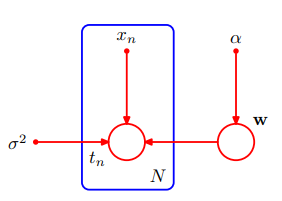

**e.g.** generative model

$t_i \sim Discrete(\{p_j\}_{j=0}^k)$  
$x_i \mid t_i \sim \mathcal{N}(\mu_{t_i}, \Sigma_{t_i})$

so $x_i$ depend on $t_i, \mu_j, \Sigma_j$

things we would like to solve

* $p(x_k) = \int_{x_1} \int_{x_2} \cdots \int_{x_{k-1}} \int_{x_{k+1}} \cdots \int_{x_n} p(x_1, ..., x_n) dx_1 \cdots dx_n$
* $p(x_k | x_1 = a, x_2 = b, ...)$
* $\arg\max_{x_k} p(x_k | x_1 = a, ...)$

**def** markov blanket

given $children(z)$, $parents(z)$, $parents(children(z))$ observed, $z$ is conditionally independent of all other variables

**def** markov random field

* given an undirected graph $G = V, E$
* for any clique (fully connected subgraph) $C \subset V$, we can write a potential function  
$\psi_C(C) \geq 0$  
note that $C$ is a set of vertices, e.g., if $|C_k| = 3$, then $C_k = \{0, 0, 0\}, \{0, 0, 1\}, \{0, 1, 0\}$, etc.
* then the joint probability  
$p(x_1, ..., x_n) = \frac{1}{Z} \prod_k \psi_{C_k} (C_k)$  
where $Z = \sum_{x_1, ..., x_n} \prod_k \psi_{C_k} (C_k)$  
$x_k \in \{0, 1\}$

**def** factor graph

two types of nodes

* random variables
* factors (similar to potential functions)

## Inference on networks

**e.g.** 

we wish to know $P(X_5 \mid X_1 = x_1, X_8 = x_8)$  
$= \sum_{X_2, X_3, X_4, X_6, X_7, X_9, X_{10}} P(X_1 = x_1) P(X_2) P(X_3) P(X_4 | x_1, X_2, X_3) P(X_6) P(X_5 | X_4, X_6) P(X_7 | X_5) P(X_8 = x_8 | X_5) P(X_{10}) P(X_9 | X_5, X_{10})$

but we can simplify this first

first sum over $X_7$ since it has one parent and no children:  
$\sum \cdots \sum_{X_7} P(X_7 | X_5)$  
then we note that $\sum_{X_7} P(X_7 | X_5) = 1$ since it is a probability

we can try to remove $X_{10}$ which has no parents but one child $X_9$ (which has parents $X_5, X_{10}$ and no children  
then we get  
$\sum \cdots \sum_{X_{10}} P(X_{10}) P(X_9 | X_{10}, X_5)$  
$= f_{X_{10}}(x_9, x_5)$

this is called ***variable elimination***